<a href="https://colab.research.google.com/github/shrutisj12/AgriSense-AI-Intelligent-Crop-Disease-Assistant/blob/main/AgriSenseAI_Phase1_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🌾 DAY 2 – Model Training + Evaluation (Crop Recommendation)

🎯 Goal:
Train and evaluate an ML model that predicts the best crop from soil + climate features, and save it for later use in your Streamlit app.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset again
df = pd.read_csv("Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#✅ Goal: Load data fresh in the same notebook (so anyone can run it from start).

#Separate Features and Target

In [4]:
X = df.drop('label', axis=1)   # independent variables
y = df['label']                # target variable


#✅ X = N, P, K, temperature, humidity, ph, rainfall
#✅ y = crop name

#Split Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 1760
Testing samples: 440


#✅ Goal: Keep 20% data for testing.
#✅ Stratify keeps class balance.

#Feature Scaling (Optional but Good)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


✅ Normalizes features for better model stability.

#Train a Model

Start with a Random Forest Classifier (works well for this dataset).

In [7]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)


#Evaluate Performance

Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00    

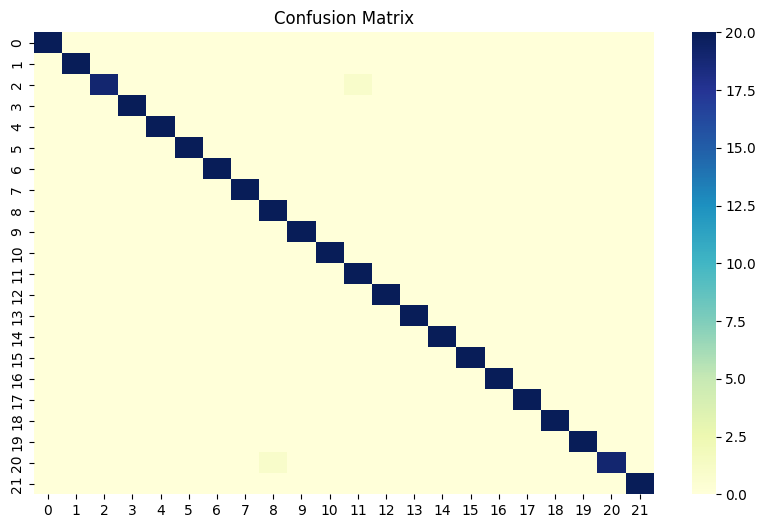

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()


#✅ Goal:

Check model accuracy (should be > 95% for this dataset)

Review misclassifications visually

#Save the Model and Scaler

In [9]:
joblib.dump(rf, 'crop_recommendation_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


#✅ These files will be used later in your Streamlit web app.

#Test Prediction Manually


In [10]:
sample = np.array([[90, 40, 40, 20.5, 82, 6.5, 202]])
sample_scaled = scaler.transform(sample)
pred = rf.predict(sample_scaled)
print("Recommended Crop:", pred[0])


Recommended Crop: rice


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#✅ Goal: Verify the model outputs a valid crop name (like rice, maize, etc.).

#Model Summary

Algorithm: Random Forest

Accuracy: XX%

Dataset: Kaggle Crop Recommendation

Inputs: N, P, K, temperature, humidity, pH, rainfall

Output: Recommended Crop Name

Model File: crop_recommendation_model.pkl